# Solar Power Generation Trends

## Overview

<style>
    table.custom-table {
        max-width: 600px;
        width: 100%;
        margin: 0 auto; /* centers the table on the page */
    }

    table.custom-table td {
        background-color: #fff;
    }
    
    table.custom-table th, table.custom-table td {
        text-align: center;
        vertical-align: middle;
        padding: 5px;
        width: 600px; /* distribute the total width equally among three columns */
    }

    table.custom-table img {
        width: 100%;
        display: block; /* removes any gap under the image */
    }
</style>


<table class="custom-table">
    <thead>
        <tr>
            <th>Additive vs Multiplicative Model</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <img src="src/04_output_1.png">
            </td>
        </tr>
        <tr>
            <td>
                <img src="src/04_output_2.png">
            </td>
        </tr>
    </tbody>
</table>

## Data

In [1]:
import pandas as pd

df = pd.read_csv('../../../data/solar_2014-2023.csv', index_col=0)
df.index = pd.to_datetime(df.index, utc=True)
df = df.tz_convert('Europe/Madrid')
df = df.resample('1h').mean()
s_solar = df.loc[:'2022', 'Solar fotovoltaica']
s_solar_monthly = s_solar.resample('M').sum()
s_solar

C:\Users\RafaelAndreo_6gt1g09\AppData\Local\Temp\ipykernel_10576\889745043.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  s_solar_monthly = s_solar.resample('M').sum()


datetime_utc
2014-01-01 00:00:00+01:00    13.6
2014-01-01 01:00:00+01:00    13.3
2014-01-01 02:00:00+01:00    13.3
2014-01-01 03:00:00+01:00    12.2
2014-01-01 04:00:00+01:00     7.8
                             ... 
2022-12-31 19:00:00+01:00     5.7
2022-12-31 20:00:00+01:00     3.6
2022-12-31 21:00:00+01:00     2.2
2022-12-31 22:00:00+01:00     1.7
2022-12-31 23:00:00+01:00     1.6
Freq: h, Name: Solar fotovoltaica, Length: 78888, dtype: float64

In [11]:
display(s_solar_monthly)

datetime_utc
2014-01-31 00:00:00+01:00     402856.200
2014-02-28 00:00:00+01:00     431246.400
2014-03-31 00:00:00+02:00     699283.900
2014-04-30 00:00:00+02:00     765308.000
2014-05-31 00:00:00+02:00     889022.100
                                ...     
2022-08-31 00:00:00+02:00    3191364.099
2022-09-30 00:00:00+02:00    2636219.180
2022-10-31 00:00:00+01:00    2056758.870
2022-11-30 00:00:00+01:00    1535995.490
2022-12-31 00:00:00+01:00    1176871.031
Freq: ME, Name: Solar fotovoltaica, Length: 108, dtype: float64

<Axes: xlabel='datetime_utc'>

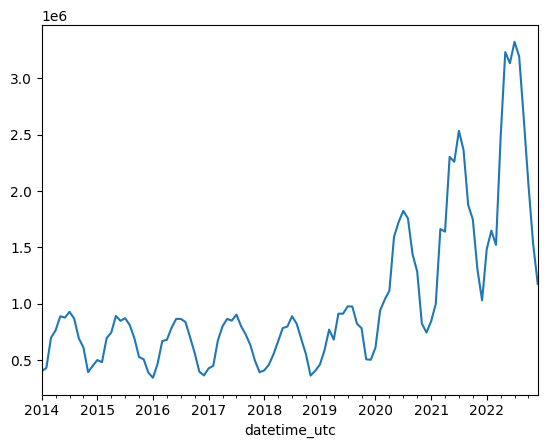

In [3]:
s_solar_monthly.plot()

## Multiplicative Model

$y_t = T_t \times S_t \times e_t$

In [20]:
df_solar_monthly = s_solar_monthly.to_frame()
df_solar_monthly.columns = ['generation']
display(df_solar_monthly)

,generation
datetime_utc,
2014-01-31 00:00:00+01:00,402856.200
2014-02-28 00:00:00+01:00,431246.400
2014-03-31 00:00:00+02:00,699283.900
2014-04-30 00:00:00+02:00,765308.000
2014-05-31 00:00:00+02:00,889022.100
...,...
2022-08-31 00:00:00+02:00,3191364.099
2022-09-30 00:00:00+02:00,2636219.180
2022-10-31 00:00:00+01:00,2056758.870


In [21]:
import statsmodels.api as sm 

data = df_solar_monthly['generation'].values
result = sm.tsa.seasonal_decompose(data, model='multiplicative', period=12)

df_component = (df_solar_monthly
 .assign(
    trend = result.trend,
    seasonal = result.seasonal,
    residual = result.resid,
    mul_components = result.trend * result.seasonal * result.resid)
 .dropna())

df_component

,generation,trend,seasonal,residual,mul_components
datetime_utc,,,,,
2014-07-31 00:00:00+02:00,928878.300,6.720014e+05,1.391756,0.993175,928878.300
2014-08-31 00:00:00+02:00,868469.700,6.782240e+05,1.297704,0.986747,868469.700
2014-09-30 00:00:00+02:00,693511.100,6.801873e+05,1.073254,0.949997,693511.100
2014-10-31 00:00:00+01:00,613785.400,6.791830e+05,0.914528,0.988173,613785.400
2014-11-30 00:00:00+01:00,394068.200,6.784604e+05,0.648951,0.895025,394068.200
...,...,...,...,...,...
2022-02-28 00:00:00+01:00,1648478.100,2.129337e+06,0.756666,1.023139,1648478.100
2022-03-31 00:00:00+02:00,1521992.800,2.195547e+06,0.974395,0.711435,1521992.800
2022-04-30 00:00:00+02:00,2475835.900,2.240085e+06,1.065528,1.037272,2475835.900


In [25]:
import plotly.express as px

fig = px.area(s_solar_monthly, x=s_solar_monthly.index, y=s_solar_monthly.values, width=700, title='Original Time Series')
fig

In [26]:
dff = df_component.drop(columns=['generation','mul_components'])
dff = dff.melt(ignore_index=False)

In [27]:
fig = px.area(dff, x=dff.index, y='value', color='variable', facet_col='variable', width=1000, height=500, title='Multiplicative Model: Components of Time Series')
fig.update_yaxes(matches=None)

## Additive Model

$y_t = T_t + S_t + e_t$

In [29]:
import statsmodels.api as sm 

data = df_solar_monthly['generation'].values
result = sm.tsa.seasonal_decompose(data, model='additive', period=12)

df_component_adi = (df_solar_monthly
 .assign(
    trend = result.trend,
    seasonal = result.seasonal,
    residual = result.resid,
    adi_components = result.trend + result.seasonal + result.resid)
 .dropna())

df_component_adi

,generation,trend,seasonal,residual,adi_components
datetime_utc,,,,,
2014-07-31 00:00:00+02:00,928878.300,6.720014e+05,353437.131770,-96560.210937,928878.300
2014-08-31 00:00:00+02:00,868469.700,6.782240e+05,271787.442187,-81541.779687,868469.700
2014-09-30 00:00:00+02:00,693511.100,6.801873e+05,61841.589062,-48517.826562,693511.100
2014-10-31 00:00:00+01:00,613785.400,6.791830e+05,-67928.927605,2531.327605,613785.400
2014-11-30 00:00:00+01:00,394068.200,6.784604e+05,-328736.811115,44344.598615,394068.200
...,...,...,...,...,...
2022-02-28 00:00:00+01:00,1648478.100,2.129337e+06,-246269.974704,-234589.189588,1648478.100
2022-03-31 00:00:00+02:00,1521992.800,2.195547e+06,-74768.379282,-598786.067468,1521992.800
2022-04-30 00:00:00+02:00,2475835.900,2.240085e+06,60382.687645,175368.246855,2475835.900


In [31]:
import plotly.express as px

fig = px.area(df_component_adi, x=df_component_adi.index, y=df_component_adi['generation'], width=700, title='Original Time Series')
fig

In [32]:
dff_adi = df_component_adi.drop(columns=['generation','adi_components'])
dff_adi = dff_adi.melt(ignore_index=False)

In [ ]:
fig = px.area(dff_adi, x=dff_adi.index, y=['value'], color='variable', facet_col='variable', width=1000, height=500, title='Multiplicative Model: Components of Time Series')
fig
